In [1]:
import sys
#sys.path.append("../metabolome_analysis_pymodule/")
#sys.path.append("../src/phloemfinder/")

from phloemfinder import utils, feature_selection_using_ml, metabolome_analysis, phenotype_analysis



import matplotlib

import numpy as np

from utils import median_of_ratios_normalisation, compute_metrics_classification, extract_samples_to_condition
from metabolome_analysis import MetaboliteAnalysis
from feature_selection_using_ml import MetabolitePhenotypeFeatureSelection

from autosklearn.classification import AutoSklearnClassifier
from autosklearn.metrics import balanced_accuracy, precision, recall, f1
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score

/Users/mgalland/opt/miniconda3/envs/sklearn/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
met = MetaboliteAnalysis(
    metabolome_csv="../tests/metabolome_test_data.csv", 
    metabolome_feature_id_col="feature_id")

In [3]:
met.validate_input_metabolome_df()
met.metabolome.shape

Metabolome input data validated.


(11059, 36)

In [4]:
print("Number of total features before blank filtering = {0}".format(met.metabolome.shape[0]))

Number of total features before blank filtering = 11059


# Filter out features (filters blank, unreliable features)

## Blank filtering

In [5]:
met.discard_features_detected_in_blanks(blank_sample_contains="blank")
print("Number of total features after blank filtering = {0}".format(met.metabolome.shape[0]))

Number of total features after blank filtering = 7544


## PCA before normalisation

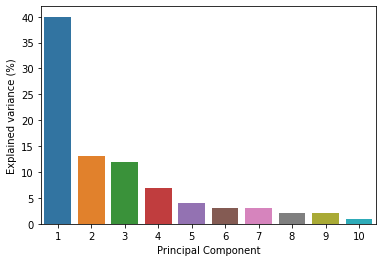

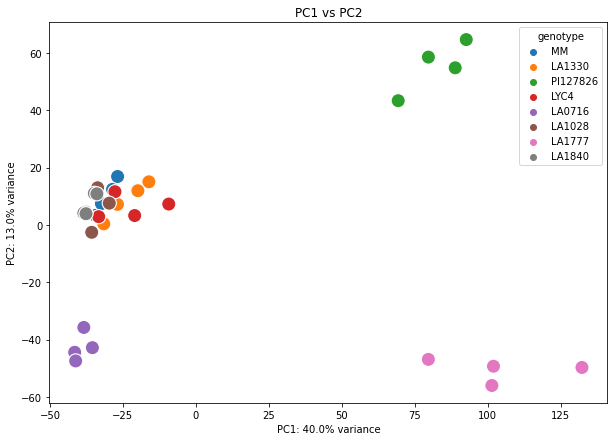

In [6]:
met.compute_pca_on_metabolites()
met.create_scree_plot()
met.create_sample_score_plot()

## PCA after normalisation

/Users/mgalland/opt/miniconda3/envs/sklearn/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


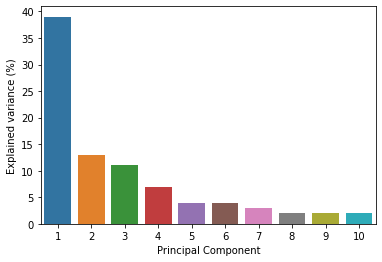

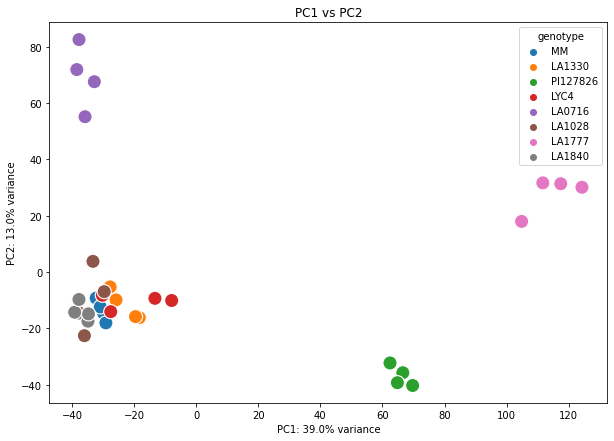

In [7]:
met.normalise_values_by_median_of_ratios_method()
met.compute_pca_on_metabolites()
met.create_scree_plot()
met.create_sample_score_plot()

## Density plots per group

In [8]:
#met.create_density_plot()

## Filter by percentile

In [9]:
met.metabolome.shape

(7544, 32)

In [12]:
met.filter_features_per_group_by_percentile(percentile=95)

In [13]:
met.compute_metabolome_sparsity()

Sparsity of the metabolome matrix is equal to 0.821


In [15]:
met.metabolome

,MM_1,MM_2,MM_3,MM_4,LA1330_1,LA1330_2,LA1330_3,LA1330_4,PI127826_1,PI127826_2,...,LA1028_3,LA1028_4,LA1777_1,LA1777_2,LA1777_3,LA1777_4,LA1840_1,LA1840_2,LA1840_3,LA1840_4
feature_id,,,,,,,,,,,,,,,,,,,,,
rt-0.79_mz-209.03032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5557.675009,6429.166178,...,0.000000,0.000000,19534.701561,0.000000,0.000000,0.000000,0.000000,6358.051366,0.000000,0.000000
rt-7.43_mz-357.15203,4776.362705,359.307597,6278.781233,565.291798,379.040133,5401.410414,108.181158,6901.175076,305.127255,459.420332,...,0.000000,5910.608695,473.918795,469.167720,728.140484,737.932235,352.070954,1008.579776,241.366040,1702.763609
rt-8.05_mz-576.02933,11758.107695,14846.729445,6528.782036,8583.246847,8233.867478,8419.266269,7384.787470,6170.878629,15024.792977,12533.475968,...,5162.013104,4708.587728,9008.310109,12305.993310,7678.188645,9591.278831,8982.699204,12625.019536,8149.172055,7791.622147
rt-5.42_mz-1219.29959,10836.530834,7737.322817,8800.913229,6304.102175,0.000000,0.000000,0.000000,0.000000,25302.405218,19763.229646,...,4987.932827,0.000000,16092.047548,4717.895394,13089.644303,4017.222120,6628.224699,881.951919,5768.239256,0.000000
rt-1.42_mz-393.98294,0.000000,0.000000,6146.037444,8731.061663,0.000000,149.710865,1041.955364,4912.443921,0.000000,0.000000,...,13549.840316,32718.096450,0.000000,0.000000,16086.628326,29294.621587,1823.923137,0.000000,11188.747776,10001.790634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rt-4.1_mz-293.12421,859.239852,866.873183,325.222284,589.261769,2384.178845,1585.753240,2150.337755,1897.759971,29985.563718,35785.853517,...,0.000000,118.319737,13868.867509,10568.692842,12608.438418,9164.345468,0.000000,328.788121,0.000000,0.000000
rt-6.15_mz-415.19725,574.511352,1063.969098,535.399950,1140.571084,1494.829269,141.831346,1148.238607,783.362971,39174.797936,31093.785515,...,696.321107,1070.255806,82240.322973,55007.155339,77094.248163,63305.752699,804.384333,837.521092,1067.737905,974.341883
rt-9.56_mz-353.22972,30617.580046,25896.310158,29334.165034,26301.049855,61035.306608,17981.062822,47075.884969,17226.404428,8559.909254,10799.096255,...,8661.381932,13313.659532,14730.012637,14560.758175,14457.282083,21050.391126,8369.019972,7153.363172,6324.608432,9164.416940


## Unreliable feature filtering

In [ ]:
met.filter_out_unreliable_features(nb_times_detected=4)

In [ ]:
met.metabolome.shape

In [ ]:
met.write_clean_metabolome_to_csv(path_of_cleaned_csv="./clean_metabolome.csv")

# Feature selection

In [ ]:
fs = MetabolitePhenotypeFeatureSelection(
    metabolome_csv="../tests/clean_metabolome.csv", 
    phenotype_csv="../tests/phenotypes_test_data.csv", 
    phenotype_sample_id='sample')

In [ ]:
fs.validate_input_metabolome_df()

In [ ]:
fs.validate_input_phenotype_df()

## Base performance

In [ ]:
fs.get_baseline_performance(
    class_of_interest='resistant',
    train_size=0.7, 
    random_state=12534)

## TPOT best model from the class

In [ ]:
fs.search_best_model_with_tpot_and_get_feature_importances(
    class_of_interest='resistant', 
    max_time_mins=4, 
    random_state=1234)

In [ ]:
fs.feature_importances.sort_values('mean_var_imp', ascending=False)